## PARSE SCIENTIFIC JOURNAL PDF FILES AND EXTRACT SPECIFIC KEYWORDS SUCH AS: TAXONOMY, NSC (UNIQUE IDENTIFIER), AUTHORS, COMPOUND NAMES

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from IPython.display import display
#import spacy
import re
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import csv

Using TensorFlow backend.
/Users/trinhsk/miniconda3/envs/nltk/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/trinhsk/miniconda3/envs/nltk/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/trinhsk/miniconda3/envs/nltk/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/trinhsk/mi

In [3]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;.]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
SHORTWORD = re.compile(r'\W*\b\w{1,3}\b')

stop_words_lst = ['cell','spectral','data','double','bond','barrier','soluble']

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = str(text).lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = re.sub(r'\b[a-zA-Z]\b','',str(text)) # remove single letter words
    text = re.sub('\d+','',text) # remove digits
    text = SHORTWORD.sub('',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    for w in stop_words_lst:
        pattern = r'\b'+w+r'\b'
        text = re.sub(pattern, '', str(text))

    return text

### taxonomy names from csv

In [4]:
import pandas as pd
import numpy as np
taxon_file = 'taxon_names.csv'
taxon_name_df = pd.read_csv(taxon_file)
#taxon_name_df.head(150)
# unit_name1 + unit_name2 is the full taxonomy name; can just make a set of each column

taxon_name_df = taxon_name_df.replace(np.nan, '', regex=True)
taxon_name_df["name"] = taxon_name_df.iloc[:, 0] + " "+ taxon_name_df.iloc[:, 1]


### open pdf file for testing

In [5]:
with open('np50121a025.pdf_OUTPUT.txt', 'r', encoding="latin-1") as f:
    read_output = f.readlines()
read_output = '\n'.join(read_output).strip().replace('\n','')
#read_output

Clean the text, get bigrams and apply TFIDF

In [10]:
print("\n\nX1 : \n", X1.toarray()) 



X1 : 
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
  1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 3

In [12]:
print("\n\nScores : \n", scores) 



Scores : 
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
  1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1

In [13]:
ranking

,term,rank
0,able assign,1
1,absorptions appropri,1
2,abstract fractionation,1
3,acetate confirmed,1
4,achn caki,1
...,...,...
987,yasumuro matsunaga,1
988,yellow pigment,1
989,yield indole,1
990,yielded series,1


In [23]:
all(X1.toarray()[0]) == all(X2.toarray()[0])

True

In [34]:
sums[0].shape

(1, 992)

In [6]:
pdf_o = clean_text(read_output)
text_tokens = word_tokenize(pdf_o)

pdf_i=[pdf_o]

# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(pdf_i)  
features = (vectorizer.get_feature_names()) 
#print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
X2 = vectorizer.fit_transform(pdf_i) 
scores = (X2.toarray()) 
#print("\n\nScores : \n", scores) 
  
# Getting top ranking features ; 992 columns
sums = X2.sum(axis = 0) #along columns -->
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) #tuple of term and rank
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(50)) 



Words : 
                        term  rank
234    cytotoxic macrolides     4
574          methine proton     3
580            methyl group     3
759        rashid cytotoxic     3
639               ncih ncih     3
709  polyoxazole macrolides     3
675             ovcar ovcar     3
455      indole derivatives     3
538    macrolides tubastreu     3
415       hmbc correlations     3
483             july rashid     3
601       molecular formula     3
481         journal natural     3
81                boyd prod     2
206            corals genus     2
148            cnmr signals     2
679           oxazole rings     2
692   partitioning protocol     2
697     permeation sephadex     2
557     matsunaga hashimoto     2
556      matsunaga fusetani     2
779     reported mycalolide     2
49       antitumor activity     2
428           hrfabms calcd     2
192          confirmed hmbc     2
425               hplc give     2
618     mycalolide isolated     2
374        give mycalolides     2
37

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
import nltk

In [50]:
import itertools
text = pdf_o
test = itertools.chain.from_iterable(nltk.pos_tag_sents(nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(text)))
[(word.lower(),tag) for word, tag in test]

[('journal', 'JJ'),
 ('natural', 'JJ'),
 ('praducts', 'NNS'),
 ('july', 'RB'),
 ('mycalolides', 'NNS'),
 ('cytotoxic', 'VBP'),
 ('macrolides', 'NNS'),
 ('collection', 'NN'),
 ('stony', 'JJ'),
 ('coral', 'JJ'),
 ('tubastrea', 'NN'),
 ('faulmverl', 'NN'),
 ('mohmimd', 'NN'),
 ('rashid', 'NN'),
 ('kirk', 'NN'),
 ('gustafson', 'NN'),
 ('john', 'NN'),
 ('cardellina', 'NN'),
 ('michael', 'NN'),
 ('boyd', 'VBP'),
 ('lcrbwatwy', 'JJ'),
 ('drug', 'NN'),
 ('discwey', 'NN'),
 ('resurcb', 'NN'),
 ('deveiopnt', 'NN'),
 ('developmntal', 'JJ'),
 ('thapeuticrs', 'NN'),
 ('program', 'NN'),
 ('division', 'NN'),
 ('cancer', 'NN'),
 ('treatment', 'NN'),
 ('national', 'JJ'),
 ('cancer', 'NN'),
 ('institute', 'NN'),
 ('building', 'VBG'),
 ('frederick', 'JJ'),
 ('maryland', 'NN'),
 ('abstract', 'JJ'),
 ('fractionation', 'NN'),
 ('cytotoxic', 'NN'),
 ('extract', 'NN'),
 ('stony', 'JJ'),
 ('coral', 'JJ'),
 ('tubastru', 'NN'),
 ('faulkneri', 'NN'),
 ('yielded', 'VBN'),
 ('series', 'NN'),
 ('cytotoxic', 'NN'),
 

In [56]:
'''
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
'''

def extract_candidate_words(text, good_tags=set(['JJ','JJR','JJS','NN','NNP','NNS','NNPS'])):
    import itertools, nltk, string

    # exclude candidates that are stop words or entirely punctuation
    punct = set(string.punctuation)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # tokenize and POS-tag words # chain.from_iterable(['ABC', 'DEF']) --> A B C D E F
    tagged_words = itertools.chain.from_iterable(nltk.pos_tag_sents(nltk.word_tokenize(sent)
                                                                    for sent in nltk.sent_tokenize(text)))
    # filter on certain POS tags and lowercase all words
    candidates = [word.lower() for word, tag in tagged_words
                  if tag in good_tags and word.lower() not in stop_words
                  and not all(char in punct for char in word)]

    return candidates

candidates = extract_candidate_words(pdf_o) #extract words that have proper POS tags

In [52]:
import networkx

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
graph = networkx.Graph()
graph.add_nodes_from(set(candidates))

In [59]:
graph.nodes

NodeView(('thapeuticrs', 'region', 'frozen', 'table', 'institute', 'hexanech', 'halichondramide', 'corresponding', 'ment', 'fractionation', 'dendrophylliidae', 'trans', 'boyd', 'coelenterate', 'partition', 'refrozen', 'parative', 'colorless', 'correlations', 'shigemori', 'pietra', 'human', 'gustafson', 'wells', 'sephadex', 'peter', 'murata', 'nudibranchs', 'sanduja', 'voucher', 'australian', 'breast', 'invitm', 'program', 'pseudomolecular', 'characteristics', 'polyoxazole', 'molt', 'correla', 'calcd', 'halicbondria', 'cytotoxic', 'kabiramides', 'methyl', 'irradiation', 'cnmr', 'active', 'mohmimd', 'permeation', 'chakrabolry', 'supply', 'close', 'definitions', 'source', 'regions', 'spec', 'brown', 'priate', 'receiwd', 'xoaplysinopsin', 'museum', 'antinunor', 'several', 'tissue', 'detailed', 'original', 'mamide', 'good', 'tions', 'wagenen', 'cleveland', 'sponges', 'limited', 'sufficient', 'tetrahe', 'mides', 'ncho', 'sponge', 'methineproton', 'average', 'cncho', 'correlation', 'mass', 'd

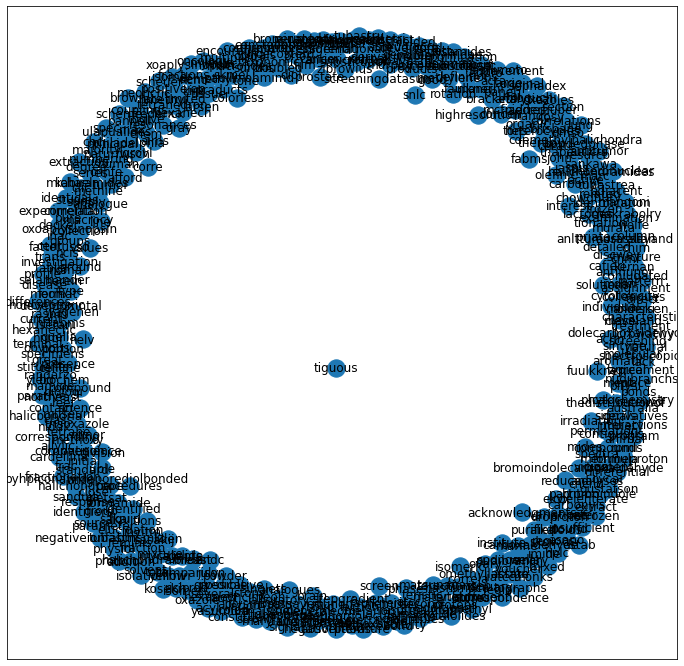

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
networkx.draw_networkx(graph, ax=ax)

In [64]:
ranks = networkx.pagerank(graph) #standard default 

In [65]:
ranks

{'thapeuticrs': 0.0020000000000000013,
 'region': 0.0020000000000000013,
 'frozen': 0.0020000000000000013,
 'table': 0.0020000000000000013,
 'institute': 0.0020000000000000013,
 'hexanech': 0.0020000000000000013,
 'halichondramide': 0.0020000000000000013,
 'corresponding': 0.0020000000000000013,
 'ment': 0.0020000000000000013,
 'fractionation': 0.0020000000000000013,
 'dendrophylliidae': 0.0020000000000000013,
 'trans': 0.0020000000000000013,
 'boyd': 0.0020000000000000013,
 'coelenterate': 0.0020000000000000013,
 'partition': 0.0020000000000000013,
 'refrozen': 0.0020000000000000013,
 'parative': 0.0020000000000000013,
 'colorless': 0.0020000000000000013,
 'correlations': 0.0020000000000000013,
 'shigemori': 0.0020000000000000013,
 'pietra': 0.0020000000000000013,
 'human': 0.0020000000000000013,
 'gustafson': 0.0020000000000000013,
 'wells': 0.0020000000000000013,
 'sephadex': 0.0020000000000000013,
 'peter': 0.0020000000000000013,
 'murata': 0.0020000000000000013,
 'nudibranchs': 0.

In [66]:
def pairwise(iterable):
        """s -> (s0,s1), (s1,s2), (s2, s3), ..."""
        a, b = tee(iterable)
        next(b, None)
        return zip(a, b)

In [80]:
from itertools import tee, takewhile
#re-configure network PageRank
for w1, w2 in pairwise(candidates):
        if w2:
            graph.add_edge(*sorted([w1, w2]))
# score nodes using default pagerank algorithm, sort by score, keep top n_keywords
ranks2 = networkx.pagerank(graph)
ranks2

{'thapeuticrs': 0.0019112988948802177,
 'region': 0.0011912332504163902,
 'frozen': 0.0013535403358859513,
 'table': 0.00333705335312492,
 'institute': 0.002809322389496822,
 'hexanech': 0.001263251999223721,
 'halichondramide': 0.002433392253612778,
 'corresponding': 0.0014601869741169195,
 'ment': 0.0012506242903217268,
 'fractionation': 0.0014339800620672605,
 'dendrophylliidae': 0.0015142623150365088,
 'trans': 0.0014114054717292183,
 'boyd': 0.004865703000348819,
 'coelenterate': 0.0011787403875486678,
 'partition': 0.0011646826980595338,
 'refrozen': 0.0017056315044136658,
 'parative': 0.00122340952544721,
 'colorless': 0.0025815556291486977,
 'correlations': 0.003903038525743318,
 'shigemori': 0.0017830851840457962,
 'pietra': 0.001963415742862204,
 'human': 0.0014058678714307152,
 'gustafson': 0.0031282811525895193,
 'wells': 0.00177443721806285,
 'sephadex': 0.0017528637224255477,
 'peter': 0.0014603974056036043,
 'murata': 0.0017405924246176245,
 'nudibranchs': 0.001649729211

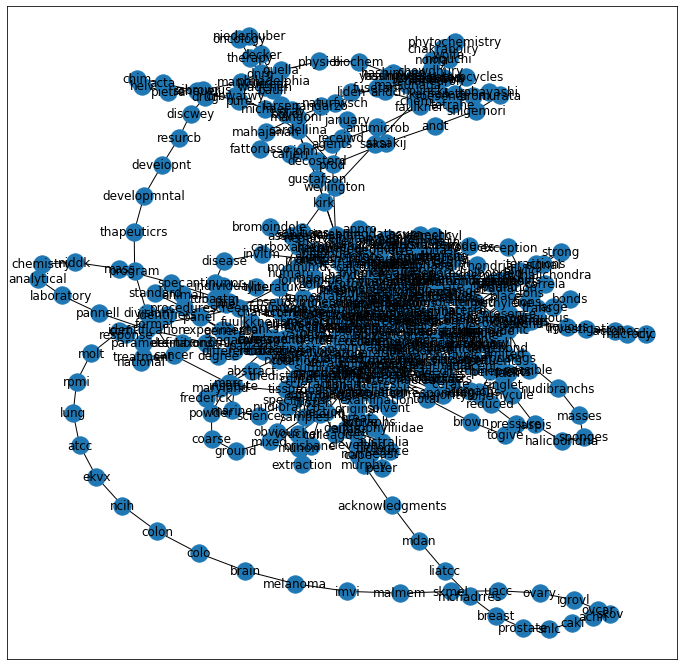

In [81]:
#after running pagerank algorithm
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
networkx.draw_networkx(graph, ax=ax)

In [82]:
n_keywords = 0.05 
words = [word.lower()
             for sent in nltk.sent_tokenize(text)
             for word in nltk.word_tokenize(sent)]
if 0 < n_keywords < 1:
    n_keywords = int(round(len(candidates) * n_keywords))
word_ranks = {word_rank[0]: word_rank[1]
              for word_rank in sorted(ranks2.items(), key=lambda x: x[1], reverse=True)[:n_keywords]}
keywords = set(word_ranks.keys())
# merge keywords into keyphrases
keyphrases = {}
j = 0
for i, word in enumerate(words):
    if i < j:
        continue
    if word in keywords:
        kp_words = list(takewhile(lambda x: x in keywords, words[i:i+10])) #only extract elements (letters?) that exist in keywords in batches of 10
        avg_pagerank = sum(word_ranks[w] for w in kp_words) / float(len(kp_words))
        keyphrases[' '.join(kp_words)] = avg_pagerank
        # counter as hackish way to ensure merged keyphrases are non-overlapping
        j = i + len(kp_words)

In [87]:
kp_words

['boyd', 'prod']

In [88]:
avg_pagerank

0.00415536428084709

In [89]:
j

1057

In [83]:
n_keywords

40

In [84]:
word_ranks

{'compound': 0.009002985938699573,
 'mycalolide': 0.008471707156256671,
 'macrolides': 0.007368559539504913,
 'fraction': 0.0069884643476941215,
 'chem': 0.0069293682612516835,
 'mycalolides': 0.006736581378440767,
 'group': 0.006656510755210632,
 'extract': 0.006400905435343412,
 'cytotoxic': 0.006289746385686772,
 'hplc': 0.005852681527392246,
 'mixture': 0.005822888912426651,
 'macrolide': 0.005504125467716546,
 'comparison': 0.005493893251058013,
 'meoh': 0.005493027445912592,
 'proton': 0.005413336584488376,
 'methyl': 0.005081666344590659,
 'faulkneri': 0.005067458783877989,
 'collection': 0.0050349180000471404,
 'oxazole': 0.005026682941591687,
 'cytotoxicity': 0.00497099244489154,
 'boyd': 0.004865703000348819,
 'imide': 0.004859849732982688,
 'similar': 0.004733494302848737,
 'tion': 0.0047227424352318465,
 'cardellina': 0.00466082545481184,
 'protons': 0.004603150799028641,
 'diol': 0.00458212852714962,
 'structure': 0.004371911771517074,
 'cnmr': 0.004217067556182862,
 'faul

In [86]:
keyphrases

{'mycalolides cytotoxic macrolides collection': 0.006357451325919899,
 'tubastrea': 0.0036799216929063188,
 'rashid': 0.0035298330796798994,
 'cardellina': 0.00466082545481184,
 'boyd': 0.004865703000348819,
 'cytotoxic extract': 0.006345325910515092,
 'faulkneri': 0.005067458783877989,
 'cytotoxic': 0.006289746385686772,
 'macrolides': 0.007368559539504913,
 'indole': 0.003686037412661602,
 'macrolides mycalolides': 0.00705257045897284,
 'compound mycalolide macrolide': 0.007659606187557596,
 'comparison': 0.005493893251058013,
 'macrolide': 0.005504125467716546,
 'extract': 0.006400905435343412,
 'collection': 0.0050349180000471404,
 'fraction': 0.0069884643476941215,
 'tion': 0.0047227424352318465,
 'structure': 0.004371911771517074,
 'cytotoxicity': 0.00497099244489154,
 'mycalolide collection': 0.006753312578151906,
 'extract faulkneri': 0.0057341821096107,
 'diol': 0.00458212852714962,
 'hplc': 0.005852681527392246,
 'mycalolides': 0.006736581378440767,
 'diol hplc': 0.0052174050

In [85]:
words

['journal',
 'natural',
 'praducts',
 'july',
 'mycalolides',
 'cytotoxic',
 'macrolides',
 'collection',
 'stony',
 'coral',
 'tubastrea',
 'faulmverl',
 'mohmimd',
 'rashid',
 'kirk',
 'gustafson',
 'john',
 'cardellina',
 'michael',
 'boyd',
 'lcrbwatwy',
 'drug',
 'discwey',
 'resurcb',
 'deveiopnt',
 'developmntal',
 'thapeuticrs',
 'program',
 'division',
 'cancer',
 'treatment',
 'national',
 'cancer',
 'institute',
 'building',
 'frederick',
 'maryland',
 'abstract',
 'fractionation',
 'cytotoxic',
 'extract',
 'stony',
 'coral',
 'tubastru',
 'faulkneri',
 'yielded',
 'series',
 'cytotoxic',
 'polyoxazole',
 'macrolides',
 'several',
 'noncytotoxic',
 'indole',
 'derivatives',
 'macrolides',
 'mycalolides',
 'isolated',
 'identified',
 'addition',
 'known',
 'compound',
 'mycalolide',
 'macrolide',
 'structures',
 'elucidated',
 'detailed',
 'analysis',
 'spectroscopic',
 'comparison',
 'related',
 'compounds',
 'stony',
 'scleractinian',
 'corals',
 'genus',
 'tubastreu',
 'd

In [38]:
def score_keyphrases_by_textrank(text, n_keywords=0.05):
    # n_keywords control the number of top keywords to reference from when doing the pagerank algorithm
    from itertools import takewhile, tee
    '''
    takewhile(lambda x: x<5, [1,4,6,4,1]) --> 1 4
    for x in iterable:
        if predicate(x):
            yield x
        else:
            break
            
    tee() -- Return n independent iterators from a single iterable
    '''
    import networkx, nltk
    
    # tokenize for all words, and extract *candidate* words
    words = [word.lower()
             for sent in nltk.sent_tokenize(text)
             for word in nltk.word_tokenize(sent)]
    candidates = extract_candidate_words(text)
    # build graph, each node is a unique candidate
    graph = networkx.Graph()
    graph.add_nodes_from(set(candidates))
    # iterate over word-pairs, add unweighted edges into graph
    def pairwise(iterable):
        """s -> (s0,s1), (s1,s2), (s2, s3), ..."""
        a, b = tee(iterable)
        next(b, None)
        return zip(a, b)
    for w1, w2 in pairwise(candidates):
        if w2:
            graph.add_edge(*sorted([w1, w2]))
    # score nodes using default pagerank algorithm, sort by score, keep top n_keywords
    ranks = networkx.pagerank(graph)
    if 0 < n_keywords < 1:
        n_keywords = int(round(len(candidates) * n_keywords))
    word_ranks = {word_rank[0]: word_rank[1]
                  for word_rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True)[:n_keywords]}
    keywords = set(word_ranks.keys())
    # merge keywords into keyphrases
    keyphrases = {}
    j = 0
    for i, word in enumerate(words):
        if i < j:
            continue
        if word in keywords:
            kp_words = list(takewhile(lambda x: x in keywords, words[i:i+10])) #only extract elements that exist in keywords in batches of 10
            avg_pagerank = sum(word_ranks[w] for w in kp_words) / float(len(kp_words))
            keyphrases[' '.join(kp_words)] = avg_pagerank
            # counter as hackish way to ensure merged keyphrases are non-overlapping
            j = i + len(kp_words)
    
    return sorted(keyphrases.items(), key=lambda x: x[1], reverse=True)

score_keyphrases_by_textrank(pdf_o)

[('compound', 0.009002985938699571),
 ('mycalolide', 0.008471707156256671),
 ('compound mycalolides', 0.007869783658570169),
 ('group compound', 0.007829748346955101),
 ('compound mycalolide macrolide', 0.007659606187557596),
 ('macrolides', 0.007368559539504916),
 ('structure mycalolide mycalolide', 0.007105108694676805),
 ('macrolides mycalolides', 0.007052570458972842),
 ('fraction', 0.00698846434769412),
 ('chem', 0.0069293682612516835),
 ('methyl mycalolide', 0.0067766867504236656),
 ('mycalolide collection', 0.006753312578151906),
 ('mycalolides', 0.006736581378440768),
 ('group', 0.006656510755210632),
 ('similar mycalolide', 0.006602600729552704),
 ('mixture macrolides', 0.0065957242259657815),
 ('class compound', 0.006467983452641953),
 ('extract', 0.006400905435343411),
 ('mycalolides cytotoxic macrolides collection', 0.006357451325919899),
 ('cytotoxic extract', 0.006345325910515091),
 ('similar mixture mycalolide', 0.006342696790510686),
 ('cytotoxic', 0.006289746385686772)

In [40]:
def extract_candidate_features(candidates, doc_text, doc_excerpt, doc_title):
    import collections, math, nltk, re
    
    candidate_scores = collections.OrderedDict()
    
    # get word counts for document
    doc_word_counts = collections.Counter(word.lower()
                                          for sent in nltk.sent_tokenize(doc_text)
                                          for word in nltk.word_tokenize(sent))
    
    for candidate in candidates:
        
        pattern = re.compile(r'\b'+re.escape(candidate)+r'(\b|[,;.!?]|\s)', re.IGNORECASE)
        
        # frequency-based
        # number of times candidate appears in document
        cand_doc_count = len(pattern.findall(doc_text))
        # count could be 0 for multiple reasons; shit happens in a simplified example
        if not cand_doc_count:
            print('**WARNING:', candidate, 'not found!')
            continue
    
        # statistical
        candidate_words = candidate.split()
        max_word_length = max(len(w) for w in candidate_words)
        term_length = len(candidate_words)
        # get frequencies for term and constituent words
        sum_doc_word_counts = float(sum(doc_word_counts[w] for w in candidate_words))
        try:
            # lexical cohesion doesn't make sense for 1-word terms
            if term_length == 1:
                lexical_cohesion = 0.0
            else:
                lexical_cohesion = term_length * (1 + math.log(cand_doc_count, 10)) * cand_doc_count / sum_doc_word_counts
        except (ValueError, ZeroDivisionError) as e:
            lexical_cohesion = 0.0
        
        # positional
        # found in title, key excerpt
        in_title = 1 if pattern.search(doc_title) else 0
        in_excerpt = 1 if pattern.search(doc_excerpt) else 0
        # first/last position, difference between them (spread)
        doc_text_length = float(len(doc_text))
        first_match = pattern.search(doc_text)
        abs_first_occurrence = first_match.start() / doc_text_length
        if cand_doc_count == 1:
            spread = 0.0
            abs_last_occurrence = abs_first_occurrence
        else:
            for last_match in pattern.finditer(doc_text):
                pass
            abs_last_occurrence = last_match.start() / doc_text_length
            spread = abs_last_occurrence - abs_first_occurrence

        candidate_scores[candidate] = {'term_count': cand_doc_count,
                                       'term_length': term_length, 'max_word_length': max_word_length,
                                       'spread': spread, 'lexical_cohesion': lexical_cohesion,
                                       'in_excerpt': in_excerpt, 'in_title': in_title,
                                       'abs_first_occurrence': abs_first_occurrence,
                                       'abs_last_occurrence': abs_last_occurrence}

    return candidate_scores

extract_candidate_features(candidates,pdf_o,pdf_o,'doc title')

OrderedDict([('journal',
              {'term_count': 3,
               'term_length': 1,
               'max_word_length': 7,
               'spread': 0.543336236933798,
               'lexical_cohesion': 0.0,
               'in_excerpt': 1,
               'in_title': 0,
               'abs_first_occurrence': 0.0,
               'abs_last_occurrence': 0.543336236933798}),
             ('natural',
              {'term_count': 3,
               'term_length': 1,
               'max_word_length': 7,
               'spread': 0.5433362369337978,
               'lexical_cohesion': 0.0,
               'in_excerpt': 1,
               'in_title': 0,
               'abs_first_occurrence': 0.0008710801393728223,
               'abs_last_occurrence': 0.5442073170731707}),
             ('praducts',
              {'term_count': 1,
               'term_length': 1,
               'max_word_length': 8,
               'spread': 0.0,
               'lexical_cohesion': 0.0,
               'in_excerpt': 1